In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [30]:
train = pd.read_csv('titanic_train.csv')

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
train.drop('Cabin',inplace = True , axis = 1)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


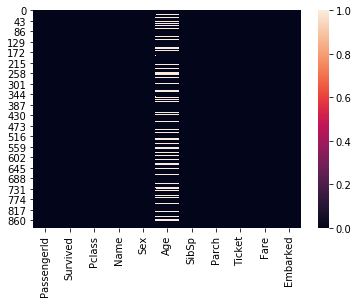

In [35]:
sns.heatmap(train.isnull())

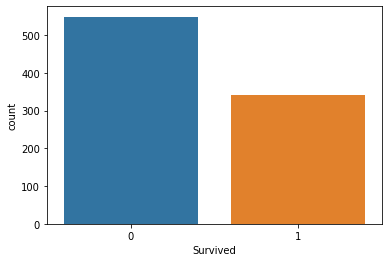

In [36]:
sns.countplot(data = train,x="Survived")

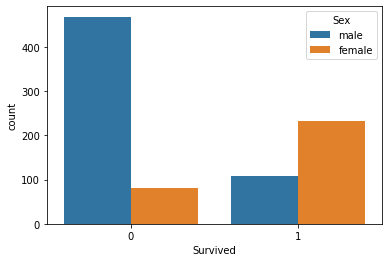

In [37]:
sns.countplot(data = train, x='Survived' , hue = 'Sex')

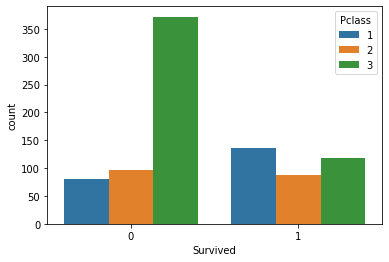

In [38]:
sns.countplot(data = train, x='Survived' , hue = 'Pclass')

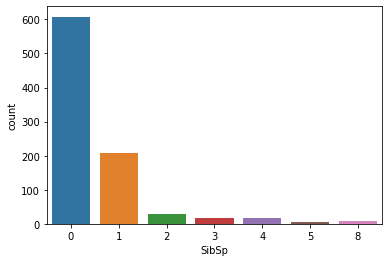

In [39]:
sns.countplot(data = train, x='SibSp')

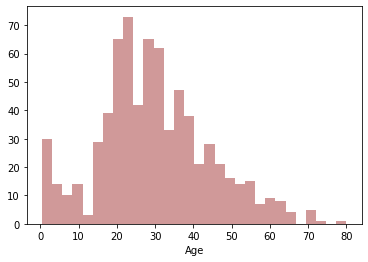

In [40]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

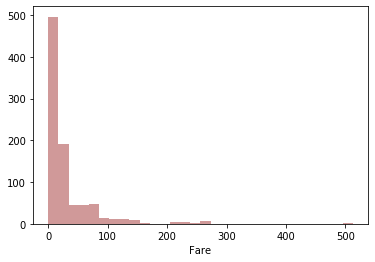

In [41]:
sns.distplot(train['Fare'].dropna(),kde=False,color='darkred',bins=30)

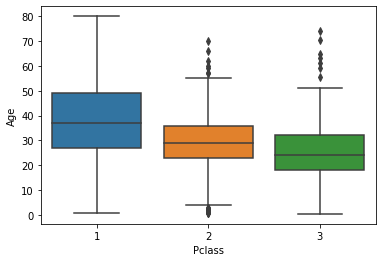

In [42]:
sns.boxplot(data = train,x = 'Pclass',y = 'Age')

In [43]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
                       
        elif Pclass == 2:
            return 29
        
        elif Pclass == 3:
            return 24
    else: 
        return Age

In [44]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

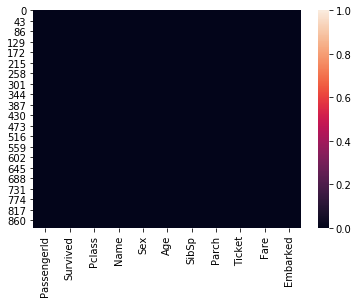

In [45]:
sns.heatmap(train.isnull())

In [46]:
train.dropna(inplace=True)

In [47]:
sex = pd.get_dummies(train['Sex'],drop_first = True)
embarked = pd.get_dummies(train['Embarked'],drop_first = True)


In [48]:
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1 ,inplace = True)

In [49]:
train = pd.concat([train,sex,embarked],axis = 1)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = train.drop(['Survived'],axis=1)
y = train['Survived']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression(dual=False,max_iter=120000)

In [60]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
prediction = lr.predict(X_test)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [ ]:
#Done